In [38]:
import pathlib
import numpy as np

ccai_path = pathlib.Path().resolve().parents[0]

experiments_fpath = pathlib.Path(f'{ccai_path}/data/experiments/quadrotor_no_obs_2')


controllers = [p.relative_to(experiments_fpath) for p in experiments_fpath.iterdir()]
num_trials = 20

min_distance_to_goals = {}
for controller in controllers:
    min_distance_to_goals[str(controller)] = []

average_constraint_violation = {}
for controller in controllers:
    average_constraint_violation[str(controller)] = []

for controller in controllers:
    for i in range(1, num_trials + 1):
        fpath = f'{experiments_fpath}/{controller}/trial_{i}/trajectory.npz'
        data = np.load(fpath)
        x = data['x']
        violation = np.abs(data['constr'][:, 0])

        # distance to goal
        min_d = np.min(np.linalg.norm((x[:, :2] - np.array([4.0, 4.0]).reshape(-1, 2)), axis=1))

        min_distance_to_goals[str(controller)].append(min_d)
        average_constraint_violation[str(controller)].append(violation)

    average_constraint_violation[str(controller)] = np.mean(np.stack(average_constraint_violation[str(controller)], axis=0), axis=0)

In [39]:
goal_thresholds = np.arange(0, 1, 0.01)
print(goal_thresholds)
success_rates = {}
for controller in controllers:
    success_rates[str(controller)] = np.zeros_like(goal_thresholds)

for controller in controllers:
    min_d = np.array(min_distance_to_goals[str(controller)])

    for i, threshold in enumerate(goal_thresholds):
        s = np.where(min_d < threshold, 1, 0).sum() / len(min_d)
        success_rates[str(controller)][i] = s



import matplotlib.pyplot as plt


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


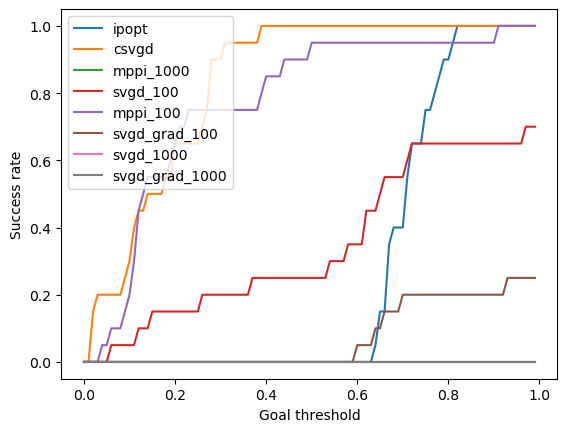

In [40]:
import matplotlib.pyplot as plt
for controller in controllers:

    plt.plot(
        goal_thresholds,
        success_rates[str(controller)],
        label=str(controller)
    )
plt.xlabel('Goal threshold')
plt.ylabel('Success rate')
plt.legend()
plt.show()


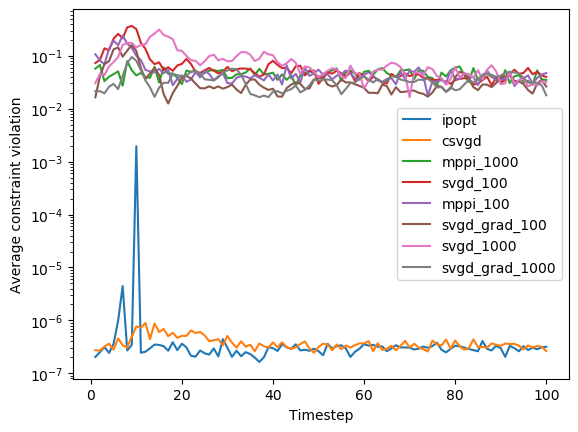

In [41]:
import matplotlib.pyplot as plt
for controller in controllers:

    plt.plot(
        np.arange(1, 101),
        average_constraint_violation[str(controller)],
        label=str(controller)
    )

plt.gca().set_yscale('log')

plt.xlabel('Timestep')
plt.ylabel('Average constraint violation')
plt.legend()
plt.show()


In [268]:
### victor table figs
import pathlib
import numpy as np

ccai_path = pathlib.Path().resolve().parents[0]

experiments_fpath = pathlib.Path(f'{ccai_path}/data/experiments/victor_table_jointspace_resampling1')


controllers = [p.relative_to(experiments_fpath) for p in experiments_fpath.iterdir()]
num_trials = 20

min_distance_to_goals = {}
applied_force = {}
for controller in controllers:
    min_distance_to_goals[str(controller)] = []

average_constraint_violation = {}
worst_constraint_violation = {}

for controller in controllers:
    average_constraint_violation[str(controller)] = []

for controller in controllers:
    worst_constraint_violation[str(controller)] = []

for controller in controllers:
    applied_force[str(controller)] = []

for controller in controllers:
    for i in range(1, num_trials + 1):
        fpath = f'{experiments_fpath}/{controller}/trial_{i}/trajectory.npz'
        data = np.load(fpath)
        x = data['x']
        violation = np.abs(data['constr']).reshape(-1, 2)

        # z violation
        violation[:, 0] = np.clip(violation[:, 0] - 3e-3, a_max=None, a_min=0)

        # distance to goal
        #min_d = np.min(np.linalg.norm((x[:, :2] - np.array([4.0, 4.0]).reshape(-1, 2)), axis=1))

        min_d = np.min(data['d2goal'])
        min_distance_to_goals[str(controller)].append(min_d)
        average_constraint_violation[str(controller)].append(violation)

        worst_constraint_violation[str(controller)].append(np.max(np.abs(violation)))

    average_constraint_violation[str(controller)] = np.mean(np.stack(average_constraint_violation[str(controller)], axis=0), axis=0)

In [280]:
goal_thresholds = np.arange(0, 0.101, 0.01)
print(goal_thresholds)
success_rates = {}
for controller in controllers:
    success_rates[str(controller)] = np.zeros_like(goal_thresholds)

for controller in controllers:
    min_d = np.array(min_distance_to_goals[str(controller)])
    max_v = np.array(worst_constraint_violation[str(controller)])
    for i, threshold in enumerate(goal_thresholds):
        s = np.where(np.logical_and(min_d < threshold, max_v < 0.01) , 1, 0).sum() / len(min_d)
        success_rates[str(controller)][i] = s



import matplotlib.pyplot as plt

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


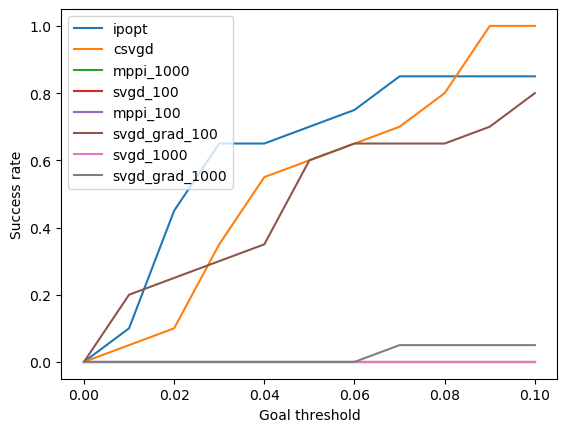

In [281]:
import matplotlib.pyplot as plt
for controller in controllers:

    plt.plot(
        goal_thresholds,
        success_rates[str(controller)],
        label=str(controller)
    )
plt.xlabel('Goal threshold')
plt.ylabel('Success rate')
plt.legend()
plt.show()

(26, 2)
(26, 2)
(26, 2)
(26, 2)
(26, 2)
(26, 2)
(26, 2)
(26, 2)


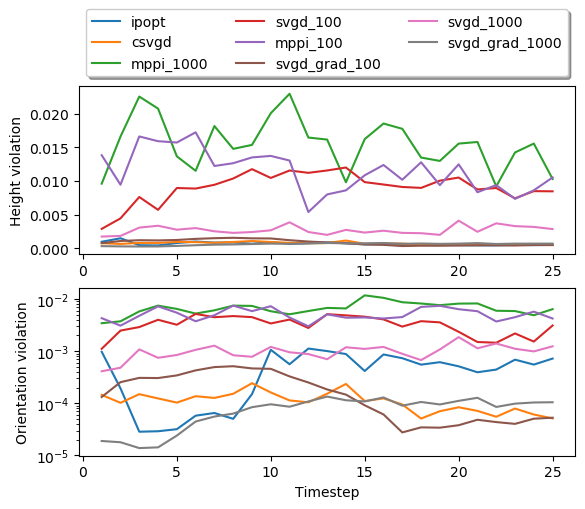

In [283]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1)
for controller in controllers:

    print(average_constraint_violation[str(controller)].shape)
    
    
    axes[0].plot(
        np.arange(1, 26),
        average_constraint_violation[str(controller)][1:, 0],
        label=str(controller)
    )
    axes[1].plot(
        np.arange(1, 26),
        average_constraint_violation[str(controller)][1:, 1],
        label=str(controller)
    )
    #axes[1].set_ylim([-0.005, 0.005])
#
plt.gca().set_yscale('log')

plt.xlabel('Timestep')
axes[0].set_ylabel('Height violation')
axes[1].set_ylabel('Orientation violation')

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


ipopt
[0.   0.3  0.75 0.75 0.75 0.8  0.8  0.85 0.85 0.85]
csvgd
[0.   0.   0.7  0.9  0.9  0.95 0.95 0.95 0.95 1.  ]
mppi_1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
svgd_100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mppi_100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
svgd_grad_100
[0.   0.   0.65 0.8  0.8  0.8  0.8  0.8  0.8  0.8 ]
svgd_1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
svgd_grad_1000
[0.   0.   0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]


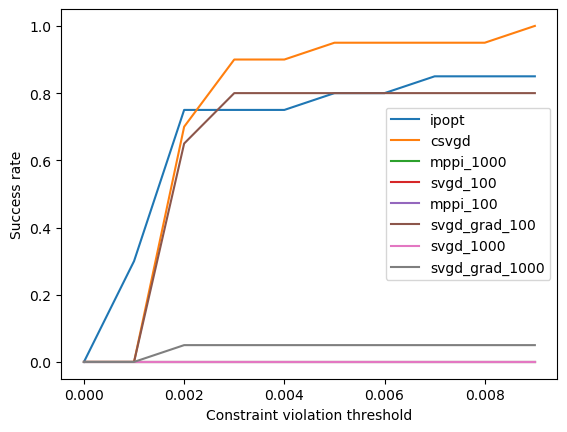

In [273]:
thresholds = np.arange(0.0, 0.01, 0.001)

success_rates = {}
for controller in controllers:
    success_rates[str(controller)] = np.zeros_like(thresholds)

for controller in controllers:
    min_d = np.array(min_distance_to_goals[str(controller)])
    max_v = np.array(worst_constraint_violation[str(controller)])
    for i, threshold in enumerate(thresholds):
        s = np.where(np.logical_and(min_d < 0.1, max_v < threshold), 1, 0).sum() / len(min_d)
        success_rates[str(controller)][i] = s

import matplotlib.pyplot as plt
for controller in controllers:

    print(controller)
    print(success_rates[str(controller)])
    plt.plot(
        thresholds,
        success_rates[str(controller)],
        label=str(controller)
    )
plt.xlabel('Constraint violation threshold')
plt.ylabel('Success rate')
plt.legend()
plt.show()

[[-9.6394265e-01 -1.6496514e-01  1.1293484e+00 -2.0564234e+00
  -1.3415358e+00 -1.5523769e+00  1.0589591e+00  2.4827616e-01
  -3.8209930e-04]
 [-9.1433835e-01 -2.9146501e-01  9.9601811e-01 -2.0286891e+00
  -1.3204640e+00 -1.5775843e+00  1.4574163e+00  2.6540744e-01
  -1.1242095e-02]
 [-9.1401184e-01 -2.4931070e-01  1.0103971e+00 -1.9878622e+00
  -1.3465761e+00 -1.5505714e+00  1.5451730e+00  2.6691374e-01
  -6.0455743e-02]
 [-9.2749614e-01 -2.0837671e-01  1.0400681e+00 -1.9507382e+00
  -1.3712225e+00 -1.5203919e+00  1.5915209e+00  2.6697439e-01
  -1.2536779e-01]
 [-9.1233593e-01 -1.7985727e-01  1.0401264e+00 -1.9283112e+00
  -1.3905609e+00 -1.4957761e+00  1.6335219e+00  2.6790851e-01
  -1.6208813e-01]
 [-7.6559007e-01 -8.8894904e-02  9.4719052e-01 -1.8847755e+00
  -1.4556016e+00 -1.4147229e+00  1.7228911e+00  2.6734072e-01
  -2.3694335e-01]
 [-6.7519361e-01  9.4748531e-03  9.0287811e-01 -1.8086421e+00
  -1.5227886e+00 -1.3497750e+00  1.8599986e+00  2.6808086e-01
  -3.6299720e-01]
 [-6.1

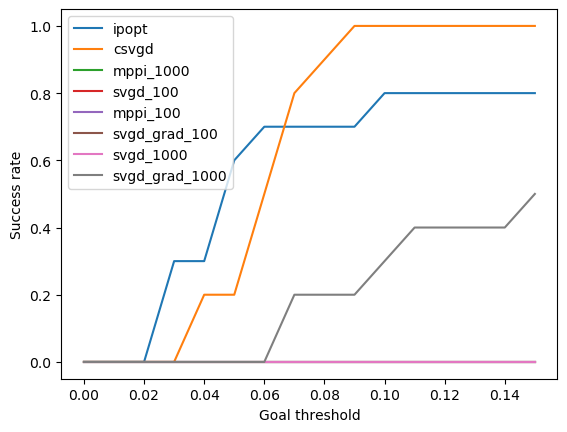

In [291]:
### victor table figs
import pathlib
import numpy as np

ccai_path = pathlib.Path().resolve().parents[0]

experiments_fpath = pathlib.Path(f'{ccai_path}/data/experiments/victor_wrench')


controllers = [p.relative_to(experiments_fpath) for p in experiments_fpath.iterdir()]
num_trials = 10

min_distance_to_goals = {}
applied_force = {}
for controller in controllers:
    min_distance_to_goals[str(controller)] = []

average_constraint_violation = {}
worst_constraint_violation = {}

for controller in controllers:
    average_constraint_violation[str(controller)] = []

for controller in controllers:
    worst_constraint_violation[str(controller)] = []

for controller in controllers:
    applied_force[str(controller)] = []

for controller in controllers:
    for i in range(1, num_trials + 1):
        fpath = f'{experiments_fpath}/{controller}/trial_{i}/trajectory.npz'
        data = np.load(fpath)
        x = data['x']

        min_d = np.min(np.abs((x[-1, -1] + np.pi / 2.0)))
        print(x)
        min_distance_to_goals[str(controller)].append(min_d)

goal_thresholds = np.arange(0, 0.151, 0.01)
print(goal_thresholds)
success_rates = {}
for controller in controllers:
    success_rates[str(controller)] = np.zeros_like(goal_thresholds)

for controller in controllers:
    min_d = np.array(min_distance_to_goals[str(controller)])
    for i, threshold in enumerate(goal_thresholds):
        s = np.where(min_d < threshold , 1, 0).sum() / len(min_d)
        success_rates[str(controller)][i] = s


import matplotlib.pyplot as plt
for controller in controllers:

    plt.plot(
        goal_thresholds,
        success_rates[str(controller)],
        label=str(controller)
    )
plt.xlabel('Goal threshold')
plt.ylabel('Success rate')
plt.legend()
plt.show()